# **IEOR 4404  Simulation (Fall 2020)**

**Homework 5 Solution  [Total points: 80 Points]**


**Due 11:59 PM, Nov 29**

Homework 4 consists of application-oriented exercises focusing on:
* `simpy` simulation of systems

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [ ]:
#Your Name: Yi-Ping Tseng
#Your UNI: yt2690

In [ ]:
!pip install sympy simpy pynverse -U

Requirement already up-to-date: sympy in /usr/local/lib/python3.6/dist-packages (1.6.2)
Requirement already up-to-date: simpy in /usr/local/lib/python3.6/dist-packages (4.0.1)
Requirement already up-to-date: pynverse in /usr/local/lib/python3.6/dist-packages (0.1.4.4)


In [ ]:
#This imports all the packages you need for the homework
#Please run this first
import numpy as np

import scipy.special as spsp
import scipy.stats as spst

import matplotlib.pyplot as plt

%matplotlib inline

import sympy
import simpy
import gc

#Exercise 1 [20 Points]

An M/M/1 queue represents the queue length in a system having a **single server**, where arrivals are determined by a **Homogeneous Poisson process** with rate $\lambda$ and job service times have an **exponential distribution** with rate $\mu$ (i.e. mean service time is $1/\mu$). 





##Q1.  [12 points]

An M/M/1 system is stationary if $\lambda<\mu$. For a non-stationary system, the queue will be growing indefinitely long as time goes to infinity. 

* Construct an M/M/1 system using `simpy` assume $\lambda=8$ and $\mu=2$. Use `Rn_arrival=np.random.RandomState(10)` to generate the random numbers used to generate the arrival times. Use `Rn_service=np.random.RandomState(100)` to the random numbers used to generate the service times. Simulate the system between $t=0$ and $t=100$

* Plot the relationship between time and the number of people in the system above (including both lining up and receiving the service ) using  [plt.step()](https://www.geeksforgeeks.org/matplotlib-pyplot-step-function-in-python/). Argue that the system is not stationary.

* Change to $\lambda=1$ and $\mu=2$. Plot the relationship between the time and the number of people in the system above (including both lining up and receiving the service ) from $t=0$ to  $t=100$ using [plt.step()](https://www.geeksforgeeks.org/matplotlib-pyplot-step-function-in-python/).  

 
 

In [ ]:
def arrival(env, desk, timeList, numberOfPeople, Rn_arrival, Rn_service, lmbda_arrival, lmbda_service):
  while True:
    inter_arrival = -1/lmbda_arrival*np.log(Rn_arrival.rand())
    yield env.timeout(inter_arrival)
    env.process(service(env, desk, timeList, numberOfPeople, Rn_service, lmbda_service))
      
def service(env, desk, timeList, numberOfPeople, Rn_service, lmbda_service):
  inter_arrival = -1/lmbda_service*np.log(Rn_service.rand())

  rqt = desk.request()
  timeList.append(env.now)
  numberOfPeople.append(len(desk.queue) + len(desk.users))
  yield rqt
  yield env.timeout(inter_arrival)

  desk.release(rqt)

def simulation(lmbda_arrival, lmbda_service, T):
  Rn_arrival = np.random.RandomState(10)
  Rn_service = np.random.RandomState(100)
  timeList = []
  numberOfPeople = []

  env = simpy.Environment()
  desk = simpy.Resource(env, capacity=1)
  env.process(arrival(env, desk, timeList, numberOfPeople, Rn_arrival, Rn_service, lmbda_arrival, lmbda_service))
  env.run(until=T)
  return timeList, numberOfPeople

Text(0.5, 1.0, 'The number of people in the system over time\n lambda=8, mu=2')

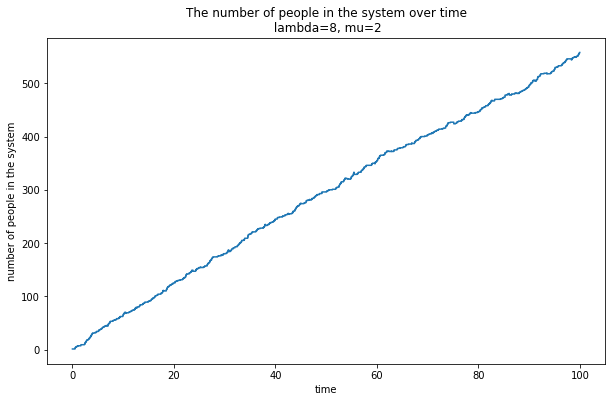

In [ ]:
timeList, numberOfPeople = simulation(8, 2, 100)

plt.figure(figsize=(10, 6))
plt.step(timeList, numberOfPeople)
plt.xlabel('time')
plt.ylabel('number of people in the system')
plt.title('The number of people in the system over time\n lambda=8, mu=2')

Text(0.5, 1.0, 'The number of people in the system over time\n lambda=1, mu=2')

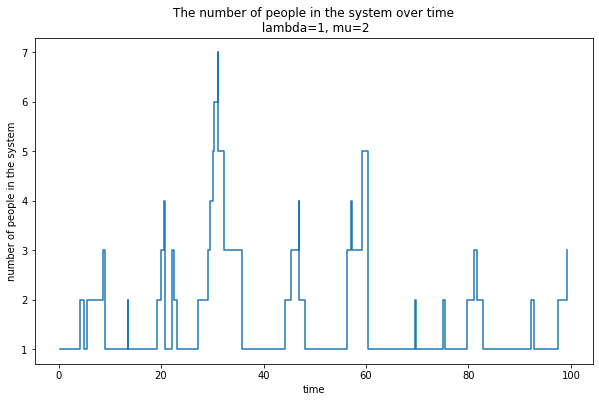

In [ ]:
timeList, numberOfPeople = simulation(1, 2, 100)

plt.figure(figsize=(10, 6))
plt.step(timeList, numberOfPeople)
plt.xlabel('time')
plt.ylabel('number of people in the system')
plt.title('The number of people in the system over time\n lambda=1, mu=2')

##Q2. [8 points]

If the system is stationary, then the probability of having $i$ customers at a sufficiently large $t$ (including the one in service) is 

$P(i)=(1-\rho)\rho^i, i=0,1,2, \dots$ .

where $\rho=\frac{\lambda}{\mu}$

For this question, let's assume we have an M/M/1 system with $\lambda=1.5$ and $\mu=2$

* Simulate the system to record the number of people in the system at t=100.
* Repeat the system simulation 1000 times.
* Plot the sample and theoretical distribution of the number of people in the system at t=100.

In [ ]:
def arrival(env, desk, lmbda_arrival, lmbda_service):
  while True:
    inter_arrival = -1/lmbda_arrival*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    env.process(service(env, desk, lmbda_service))
      
def service(env, desk, lmbda_service):
  inter_arrival = -1/lmbda_service*np.log(np.random.rand())
  rqt = desk.request()
  yield rqt
  yield env.timeout(inter_arrival)
  desk.release(rqt)

def simulation(lmbda_arrival, lmbda_service, T):
  env = simpy.Environment()
  desk = simpy.Resource(env, capacity=1)
  env.process(arrival(env, desk, lmbda_arrival, lmbda_service))
  env.run(until=T)
  return len(desk.users) + len(desk.queue)

In [ ]:
samples = [simulation(1.5, 2, 100) for _ in range(1000)]

In [ ]:
unique, counts = np.unique(samples, return_counts=True)
x = np.arange(max(unique))
phi = 1.5 / 2
theory = (1 - phi) * phi**(x)

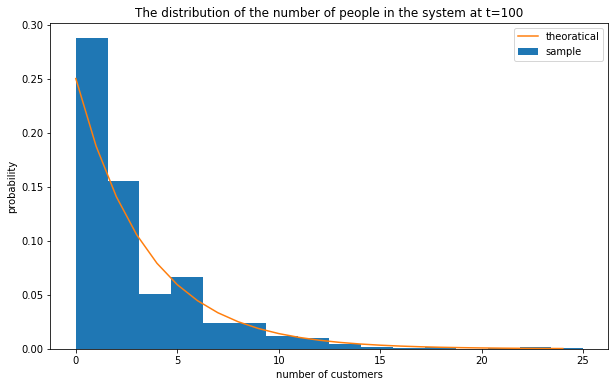

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(samples, label='sample', density=True, bins=16)
plt.plot(x, theory, label='theoratical')
plt.xlabel('number of customers')
plt.ylabel('probability')
plt.title('The distribution of the number of people in the system at t=100')
plt.legend()

#Exercise 2 [30 Points]

##Setting

![title](https://onlinevending.com/wp-content/uploads/2016/07/Untitled-106-300x300.png)

A vending machine has 15 different products. The vending machines started as full with 20 units in stock for each product (300 items in total). Customers arrive every 0.1 hours at a vending machine and make a purchase. Each customer wants to purchase $x$ units of product $i$. Let's assume that $i$ is equally likely to be between 1 and 15. For $x$, let's assume follows a discrete uniform distribution between 0 and 3. If product $i$ has stock level $s$ is lower than what the customer wants, the customer will purchase all the units left for the product $i$. 

Once the stock level of any product goes below $z$ and no refill order is waiting to be fulfilled, a refill will be requested. The refill takes 1.95 hours to be fulfilled. During the process, consumers can still make purchases normally. Once the refill request is fulfilled, the vending machine becomes full again.

Let's assume that the sales of each item generate a profit of 0.5 dollars. Each refill trip costs 20 dollars. The cost is counted once a refill process starts.

**<font color="red">In this question, you are NOT allowed to use any built-in sampling function except np.random.rand() </font>**



## Q1. [23 points]

* Based on `simpy`, simulate the system for a week. Assume $z=4$. Return the revenue from the goods minus the refill trip costs. 
* Repeat the system 100 times. Report the average revenue.

In [ ]:
def arrival(env, desk, z, profitList, costList, customer_request, debug=False):
  inventory = {k: 20 for k in range(1, 16, 1)}
  profit = 0

  while True:
    product_id = int(np.random.rand() / (1/15)) + 1
    purchase_unit = int(np.random.rand() / (1/4))
    customer_request.append((product_id, purchase_unit))
    yield env.timeout(0.1)

    if inventory[product_id] < purchase_unit:
      profitList.append(inventory[product_id] * 0.5)
      inventory[product_id] = 0
    else:
      profitList.append(purchase_unit * 0.5)
      inventory[product_id] -= purchase_unit

    if inventory[product_id] < z:
      costList.append(20)
      if debug:
        print('request a refill, profit: %.f, time: %.f' % (profit, env.now))
      env.process(refill(env, desk))
      inventory = {k: 20 for k in range(1, 16, 1)}


def refill(env, desk):
  rqt = desk.request()
  yield rqt
  yield env.timeout(1.95)
  desk.release(rqt)


def simulation(z, T, debug=False):
  profitList = []
  costList = []
  customer_request = []

  if debug:
    np.random.seed(1)
  env = simpy.Environment()
  desk = simpy.Resource(env, capacity=1)
  env.process(arrival(env, desk, z, profitList, costList, customer_request, debug=debug))
  env.run(until=T)

  if debug:
    return profitList, costList, customer_request
  else:
    return profitList, costList

In [ ]:
z = 4
T = 24 * 7
profitList, costList, customer_request = simulation(z, T, True)

request a refill, profit: 0, time: 6
request a refill, profit: 0, time: 15
request a refill, profit: 0, time: 21
request a refill, profit: 0, time: 31
request a refill, profit: 0, time: 40
request a refill, profit: 0, time: 47
request a refill, profit: 0, time: 54
request a refill, profit: 0, time: 64
request a refill, profit: 0, time: 68
request a refill, profit: 0, time: 76
request a refill, profit: 0, time: 84
request a refill, profit: 0, time: 90
request a refill, profit: 0, time: 96
request a refill, profit: 0, time: 107
request a refill, profit: 0, time: 116
request a refill, profit: 0, time: 128
request a refill, profit: 0, time: 138
request a refill, profit: 0, time: 146
request a refill, profit: 0, time: 151
request a refill, profit: 0, time: 158
request a refill, profit: 0, time: 168


In [ ]:
z = 4
T = 24 * 7

revenueList = []
for _ in range(100):
  p, c = simulation(z, T)
  revenueList.append(sum(p) - sum(c))

In [ ]:
np.mean(revenueList)

871.075

##Q2. [7 points]

* Now, use different $z$ values for the exercise in Q1. Plot the relationship between $z$ and the average system output.
* Find the best $z$ value.

In [ ]:
T = 24 * 7

avgRevenueList = []
avgProfitList = []
avgCostList = []
for z in range(1, 21, 1):

  revenueList = []
  profitList = []
  costList = []
  for _ in range(100):
    p, c = simulation(z, T)
    revenueList.append(sum(p) - sum(c))
    profitList.append(sum(p))
    costList.append(sum(c))

  avgRevenueList.append(np.mean(revenueList))
  avgProfitList.append(np.mean(profitList))
  avgCostList.append(np.mean(costList))

In [ ]:
for index in range(1, 21, 1):
  print('z: ', index, '\t\tprofit: ', avgProfitList[index-1], '\tcost:', avgCostList[index-1], '\trevenue: ', avgRevenueList[index-1])

z:  1 		profit:  1254.065 	cost: 310.8 	revenue:  943.265
z:  2 		profit:  1260.135 	cost: 338.4 	revenue:  921.735
z:  3 		profit:  1259.47 	cost: 363.8 	revenue:  895.67
z:  4 		profit:  1260.015 	cost: 394.8 	revenue:  865.215
z:  5 		profit:  1257.285 	cost: 425.8 	revenue:  831.485
z:  6 		profit:  1260.695 	cost: 473.0 	revenue:  787.695
z:  7 		profit:  1262.185 	cost: 518.6 	revenue:  743.585
z:  8 		profit:  1257.85 	cost: 579.4 	revenue:  678.45
z:  9 		profit:  1258.9 	cost: 652.0 	revenue:  606.9
z:  10 		profit:  1258.325 	cost: 748.2 	revenue:  510.125
z:  11 		profit:  1261.91 	cost: 862.0 	revenue:  399.91
z:  12 		profit:  1258.585 	cost: 1022.4 	revenue:  236.185
z:  13 		profit:  1260.225 	cost: 1238.0 	revenue:  22.225
z:  14 		profit:  1260.2 	cost: 1514.0 	revenue:  -253.8
z:  15 		profit:  1262.005 	cost: 2056.0 	revenue:  -793.995
z:  16 		profit:  1256.72 	cost: 2796.8 	revenue:  -1540.08
z:  17 		profit:  1257.74 	cost: 3725.6 	revenue:  -2467.86
z:  18 		prof

According to the simulation, we should refill the vending machine by setting z = 1, 
which means only when one product is sold out.




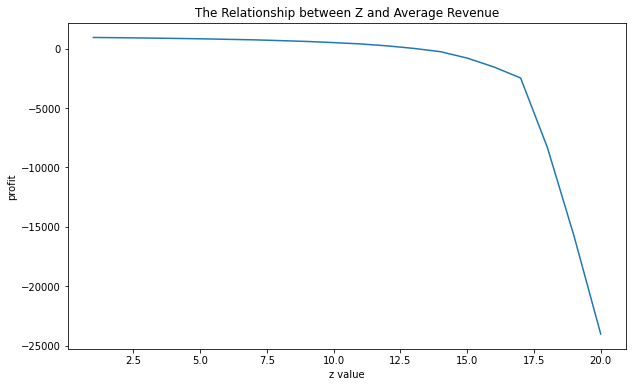

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(1, 21, 1)), avgRevenueList)
plt.xlabel('z value')
plt.ylabel('profit')
plt.title('The Relationship between Z and Average Revenue')

print('According to the simulation, we should refill the vending machine by setting z = 1, \nwhich means only when one product is sold out.\n\n')

# Exercise 3 [30 Points]




![title](https://images.squarespace-cdn.com/content/v1/518ac285e4b0288d5ff90c6f/1377221007294-HNC3JDD4UW9QY2G5LC1D/ke17ZwdGBToddI8pDm48kCMWMBFcqQftRz-JqZZoIB5Zw-zPPgdn4jUwVcJE1ZvWEtT5uBSRWt4vQZAgTJucoTqqXjS3CfNDSuuf31e0tVHNITcGTe41xBuPe_t-alTYdDq7Kkl9qklZ5rK1q7N4dsyd8tRlQIE8kTD4VvGRtXw/car-wash-hand-dry-hp.jpg) 



Customers arrive at a car wash shop following a homogeneous Poisson process with $\lambda=5$ [expected number arrivals is 5 per hour] between hour 8 (8 am)  and 20 (8 pm). 
Upon arrival, they will get auto-cleaning service （including payment）. The service time follows:

|Service Type | Time| Choice Probability|Price| 
|---|---|---|---|
|Silver|5 minutes|0.3|10 dollars|
|Gold|6 minutes|0.5|12 dollars|
|Platinum|7 minutes|0.2|15 dollars|

The auto-cleaning device can only take 1 customer at a time. The service order follows first come first serve.


After this stage, cars will then wait for workers to hand-dry the car. There are two workers. Depending on the car, worker 1 can take uniformly between 10 and 20 minutes, while worker 2 can take uniformly between 15 and 30 minutes. Each worker knows exactly how long it will take after they identify the car and before they start the drying process.

|Worker|  Service Time|
|---|---|
|1|Uniform(10,20)|
|2|Uniform(15,30)|

[Worker 1 on average is faster than worker 2 when working alone]

A car will receive the service with the worker who becomes available first. The service order follows first come first serve.

If both worker 1 and worker 2 are available at the same time, 
* worker 2 will work on the car if he expects the drying process will take less than 25 minutes when working alone.
* otherwise, worker 1 and worker 2 will work together. The service time will be half of the time if worker 2 works alone. 


Due to space limitations, the system can only accomondate 5 cars at the same time (including both cars receiving the service and cars waiting). If a car cannot fit in the system, the car will leave and not return. 

 

Cars arrived before hour 8 and after hour 20 cannot enter. However, all cars entered before hour 20 will finish receiving the service.

**<font color="red">In this question, you are NOT allowed to use any built-in sampling function except np.random.rand() </font>**



##Q1. [23 Points]

* Simulate the system to compute the revenue generated during the day.
* Simulate the system for 1000 rounds. Plot the distribution of the profit.



In [ ]:
def arrival(env, auto_cleaning, worker1, worker2, output):
  lmbda = 5
  while True: 
    inter_arrival = -1/lmbda*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    all_customers = len(auto_cleaning.queue) + len(auto_cleaning.users)
    # the queue for worker1 and work2 is the same, and they can serve simultaneously
    all_customers += len(worker1.queue) + len(worker1.users) + len(worker2.users)
    # print(len(auto_cleaning.queue), len(auto_cleaning.users), len(worker1.queue), len(worker1.users), len(worker2.users))
    if all_customers >= 5:
      continue

    if env.now <= 12:
      env.process(auto_cleaning_service(env, auto_cleaning, worker1, worker2, output))
    else:
      break

def auto_cleaning_service(env, auto_cleaning, worker1, worker2, output):
  rqt = auto_cleaning.request()
  yield rqt

  prob = np.random.rand()
  if prob < 0.3:
    # silver service
    process_time = 5 / 60
    revenue = 10

  elif prob < 0.8:
    process_time = 6 / 60
    revenue = 12

  else: 
    process_time = 7 / 60
    revenue = 15
  
  yield env.timeout(process_time)
  auto_cleaning.release(rqt)
  env.process(hand_dry_service(env, worker1, worker2))
  output.append(revenue)

def hand_dry_service(env, worker1, worker2):
  rqt1 = worker1.request()
  rqt2 = worker2.request()

  result = yield rqt1 | rqt2
  # worker 1 is available
  if (rqt1 in result) and (rqt2 not in result):
    rqt2.cancel()
    service_time = (10 + np.random.rand() * 10) / 60
    yield env.timeout(service_time)
    worker1.release(rqt1)
    
  # worker 2 is available
  elif (rqt2 in result) and (rqt1 not in result):
    rqt1.cancel()
    service_time = (15 + np.random.rand() * 15) / 60
    yield env.timeout(service_time)
    worker2.release(rqt2)
  
  # both are available
  else:
    worker2_service_time = 15 + np.random.rand() * 15
    if worker2_service_time < 25:
      rqt1.cancel()
      yield env.timeout(worker2_service_time / 60)
      worker2.release(rqt2)
    
    else:
      worker2_service_time = worker2_service_time / 2
      worker1_service_time = 10 + np.random.rand() * 10
      yield env.timeout(max(worker1_service_time, worker2_service_time) / 60)
      worker1.release(rqt1)
      worker2.release(rqt2)

def simulation():
  output = []
  env = simpy.Environment()
  auto_cleaning = simpy.Resource(env)
  worker1 = simpy.Resource(env)
  worker2 = simpy.Resource(env)
  env.process(arrival(env, auto_cleaning, worker1, worker2, output))
  env.run()

  return sum(np.array(output))

In [ ]:
output = []
env = simpy.Environment()
auto_cleaning = simpy.Resource(env)
worker1 = simpy.Resource(env)
worker2 = simpy.Resource(env)
env.process(arrival(env, auto_cleaning, worker1, worker2, output))
env.run()
print('one day revenue: %.f' % sum(output))

one day revenue: 431


In [ ]:
samples = [simulation() for _ in range(1000)]

Text(0.5, 1.0, 'The Distribution of Simulated Daily Revenue')

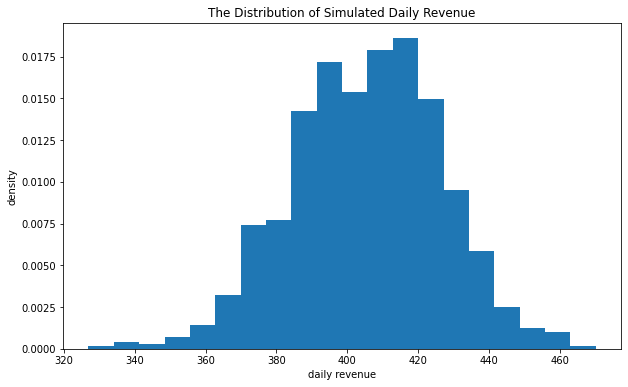

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(samples, density=True, bins=20)
plt.xlabel('daily revenue')
plt.ylabel('density')
plt.title('The Distribution of Simulated Daily Revenue')

##Q2. [7 Points]

The company thinking about purchasing a device that would auto-dry the car. This will add 1 minute to the auto-service time. For the hand-dry part, the service will only be 20% of the previous time. 

For the hand-dry part, the cars will receive the service with the worker available first. If both worker1 and worker 2 are available, worker 2 will always get the customer. Worker 1 and Worker 2 will not work on the same car anymore. 

* Based on simulation, decide whether this plan will increase revenue.

In [ ]:
def arrival(env, auto_cleaning, worker1, worker2, output):
  lmbda = 5
  while True: 
    inter_arrival = -1/lmbda*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    all_customers = len(auto_cleaning.queue) + len(auto_cleaning.users)
    all_customers += len(worker1.queue) + len(worker1.users) + len(worker2.users)
    if all_customers >= 5:
      continue

    if env.now <= 12:
      env.process(auto_cleaning_service(env, auto_cleaning, worker1, worker2, output))
    else:
      break

def auto_cleaning_service(env, auto_cleaning, worker1, worker2, output):
  rqt = auto_cleaning.request()
  yield rqt

  prob = np.random.rand()
  if prob < 0.3:
    # silver service
    process_time = 5 / 60
    revenue = 10

  elif prob < 0.8:
    process_time = 6 / 60
    revenue = 12

  else: 
    process_time = 7 / 60
    revenue = 15
  
  yield env.timeout(process_time + 1/60)
  auto_cleaning.release(rqt)
  env.process(hand_dry_service(env, worker1, worker2))
  output.append(revenue)

def hand_dry_service(env, worker1, worker2):
  rqt1 = worker1.request()
  rqt2 = worker2.request()

  result = yield rqt1 | rqt2
  # worker 1 is available
  if (rqt1 in result) and (rqt2 not in result):
    rqt2.cancel()
    service_time = 10 + np.random.rand() * 10
    service_time *= 0.2
    yield env.timeout(service_time / 60)
    worker1.release(rqt1)
    
  # worker 2 is available
  elif (rqt2 in result) and (rqt1 not in result):
    rqt1.cancel()
    service_time = 15 + np.random.rand() * 15
    service_time *= 0.2
    yield env.timeout(service_time / 60)
    worker2.release(rqt2)
  
  # both are available
  else:
    worker2_service_time = 15 + np.random.rand() * 15
    worker2_service_time *= 0.2
    rqt1.cancel()
    yield env.timeout(worker2_service_time / 60)
    worker2.release(rqt2)
    

def simulation():
  output = []
  env = simpy.Environment()
  auto_cleaning = simpy.Resource(env)
  worker1 = simpy.Resource(env)
  worker2 = simpy.Resource(env)
  env.process(arrival(env, auto_cleaning, worker1, worker2, output))
  env.run()

  return sum(np.array(output))

In [ ]:
samples_modified = [simulation() for _ in range(1000)]

Text(0.5, 1.0, 'The Distribution of Simulated Daily Revenue')

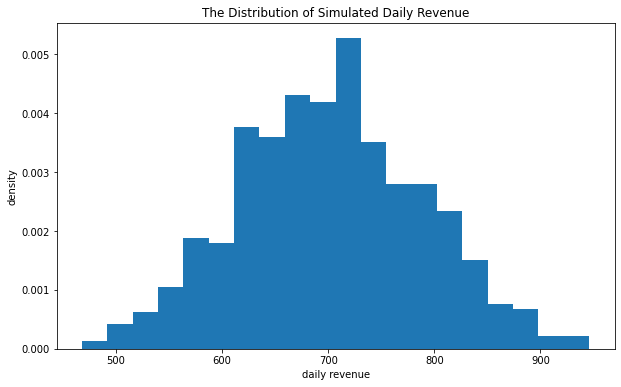

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(samples_modified, density=True, bins=20)
plt.xlabel('daily revenue')
plt.ylabel('density')
plt.title('The Distribution of Simulated Daily Revenue')

In [ ]:
ci = (np.mean(samples) - 1.96*np.std(samples, ddof=1), np.mean(samples) + 1.96*np.std(samples, ddof=1))
ci_modified = (np.mean(samples_modified) - 1.96*np.std(samples_modified, ddof=1), np.mean(samples_modified) + 1.96*np.std(samples_modified, ddof=1))

In [ ]:
print('The difference of mean daily revenue is: %.3f' % (np.mean(samples_modified) - np.mean(samples)))
print('the confidence interval of original daily revenue: ', ci)
print('the confidence interval of modified daily revenue: ', ci_modified)
print('\n')
print('Since the mean difference of daily revenue is large ')
print('and the 95% confidence interval of daily revenue does not overlap,')
print('which means the modification will significantly increase the daily revenue')

The difference of mean daily revenue is: 296.705
the confidence interval of original daily revenue:  (364.1701228273086, 446.5278771726914)
the confidence interval of modified daily revenue:  (533.0399714635009, 871.068028536499)


Since the mean difference of daily revenue is large 
and the 95% confidence interval of daily revenue does not overlap,
which means the modification will significantly increase the daily revenue
